In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("pay_fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


<ipython-input-3-b61a57746aa7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


<Axes: >

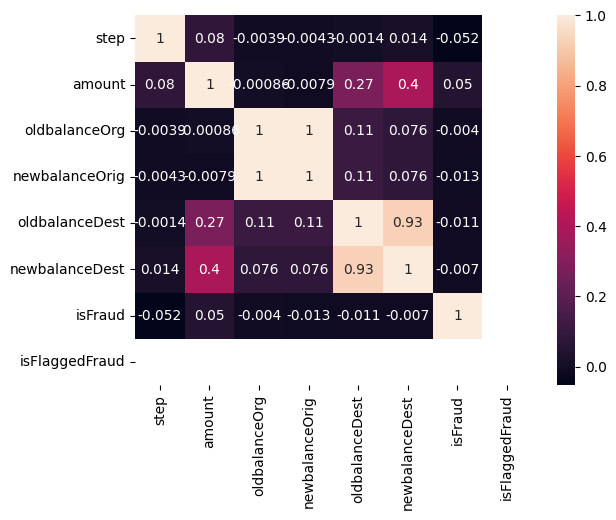

In [ ]:
#Looking for correlation between categories
corr= df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
#dropping unusuable columns
df = df.drop(columns=["step","amount","nameOrig","nameDest","isFlaggedFraud"])

In [ ]:
df.describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,65535.000000
mean,8.560136e+05,8.717559e+05,8.454880e+05,1.177746e+06,0.001602
std,2.648543e+06,2.686510e+06,2.398260e+06,2.877539e+06,0.039996
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.986600e+04,0.000000e+00,1.091063e+04,1.370711e+04,0.000000
75%,1.618374e+05,1.853247e+05,4.995363e+05,9.475543e+05,0.000000
max,3.380000e+07,3.400000e+07,3.130000e+07,3.200000e+07,1.000000


In [ ]:
#check for datatpy and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            65535 non-null  object 
 1   oldbalanceOrg   65535 non-null  float64
 2   newbalanceOrig  65535 non-null  float64
 3   oldbalanceDest  65535 non-null  float64
 4   newbalanceDest  65535 non-null  float64
 5   isFraud         65535 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ MB


In [ ]:
#vectorizing data of type
le = LabelEncoder()
le.fit(df["type"].unique())
df["type"] = le.transform(df["type"])

In [ ]:
data_used_x = df[["type","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]]
data_used_y = df["isFraud"]

<Axes: >

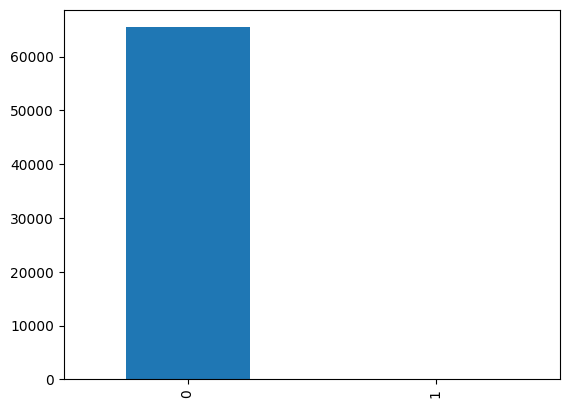

In [ ]:
#visualizing the y parameter/ shows unbalanced dataset
data_used_y.value_counts().plot(kind="bar")

#Predictive Model

In [ ]:
train_x ,test_x ,train_y , test_y = train_test_split(data_used_x,data_used_y, train_size = 0.2)

In [ ]:
#making model without hyper parameters
dtc = DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred_y = dtc.predict(test_x)

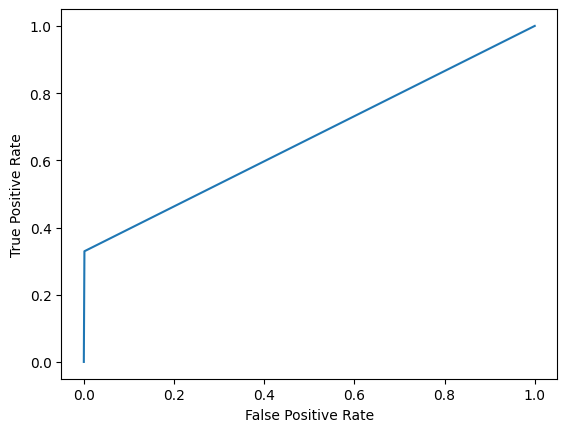

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#df["isFraud"].replace({1:"Fraud",0:"No Fraud"},inplace=True)

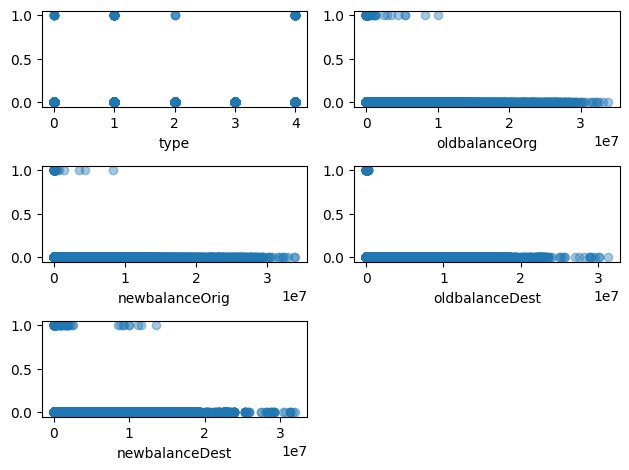

In [ ]:
#plotting pred and test data
num_plot = 1
for x in train_x:
  plt.subplot(3,2,num_plot)
  plt.scatter(test_x[x],pred_y,alpha=0.4)
  plt.xlabel(x)
  num_plot+=1
plt.tight_layout()
plt.show()

Accuracy of Model: 0.9975776302738995


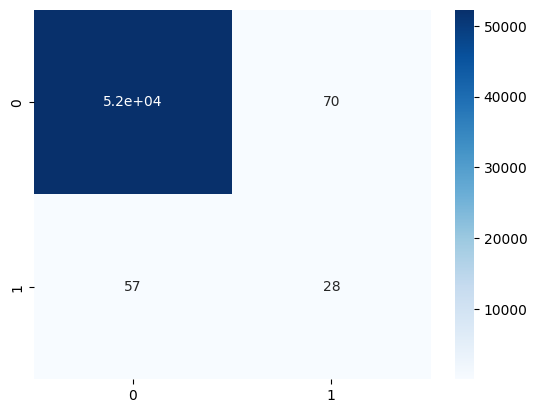

In [ ]:
#different representation of actual and predicted label
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_y,pred_y)
sns.heatmap(conf,annot=True,cmap="Blues")
print(f"Accuracy of Model: {accuracy_score(test_y,pred_y)}")

In [ ]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
smote_x, smote_y = pipeline.fit_resample(data_used_x, data_used_y)
print(smote_y.value_counts())

0    13086
1     6543
Name: isFraud, dtype: int64


<Axes: >

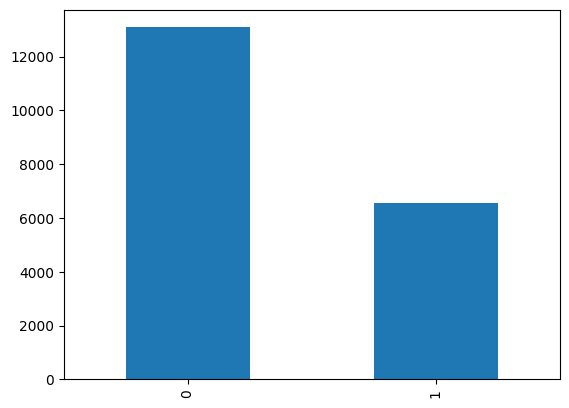

In [ ]:
smote_y.value_counts().plot(kind="bar")

In [ ]:
train_smote_x, test_smote_x, train_smote_y, test_smote_y = train_test_split(smote_x, smote_y, train_size = 0.2)
dtc.fit(train_smote_x,train_smote_y)
pred_smote_y = dtc.predict(test_smote_x)

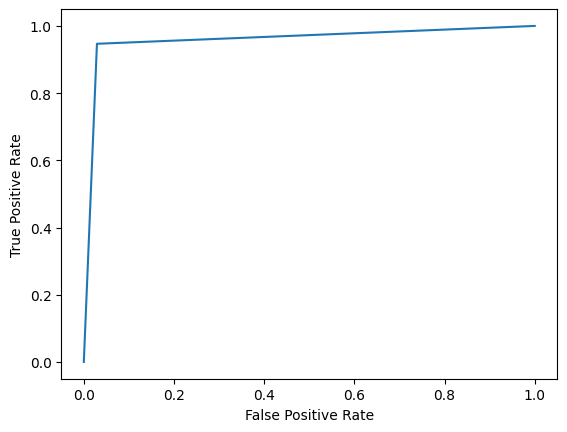

In [ ]:
fpr, tpr, thresholds = roc_curve(test_smote_y, pred_smote_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()